# Capstone Project Notebook #2 - Exploratory Data Analysis

#### Overview
The purpose of this notebook to is to explore the cleaned dataset & identify features that may need to be engineered to improve model performance.

#### Sections
[1. Distribution of Numeric Data](#section1)  
[2. Relationship Between Predictive Features & Views](#section2)  
[3. Top Artist by Views & Streams](#section3)  
[4. Correlation Between Features](#section4)  
[5. Pitch Class Notation (Key)](#section5)  
[6. Views by Album Type](#section6)  
[7. Next Steps](#section7)

---

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import cleaned data
df = pd.read_csv('data/cleaned_data.csv')

# Examine dataframe
df.head()

,Artist,Track,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,...,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,...,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,...,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,...,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,...,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,...,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


---

In [3]:
# Examine data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20099 non-null  object 
 1   Track             20099 non-null  object 
 2   Album_type        20099 non-null  object 
 3   Danceability      20099 non-null  float64
 4   Energy            20099 non-null  float64
 5   Key               20099 non-null  float64
 6   Loudness          20099 non-null  float64
 7   Speechiness       20099 non-null  float64
 8   Acousticness      20099 non-null  float64
 9   Instrumentalness  20099 non-null  float64
 10  Liveness          20099 non-null  float64
 11  Valence           20099 non-null  float64
 12  Tempo             20099 non-null  float64
 13  Duration_ms       20099 non-null  float64
 14  Url_youtube       20099 non-null  object 
 15  Title             20099 non-null  object 
 16  Channel           20099 non-null  object

After cleaning, I still have a few features that are our strings or boolean values. During this analysis, I'll want to figure out which of those features I want to keep so I can encode them.

In [4]:
# Examine descriptive statistics
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,2.009900e+04,2.009900e+04,2.009900e+04,2.009900e+04,2.009900e+04
mean,0.620341,0.635337,5.303647,-7.657251,0.096240,0.288712,0.055870,0.191615,0.529241,120.630673,2.249283e+05,9.435381e+07,6.638502e+05,2.754543e+04,1.365438e+08
std,0.165293,0.213696,3.578428,4.616015,0.110331,0.285776,0.193026,0.165614,0.245403,29.595116,1.259050e+05,2.755411e+08,1.791673e+06,1.934518e+05,2.435265e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.519000,0.508000,2.000000,-8.820000,0.035650,0.043800,0.000000,0.094000,0.339000,97.002000,1.803265e+05,1.841181e+06,2.165200e+04,5.130000e+02,1.839474e+07
50%,0.638000,0.666000,5.000000,-6.536000,0.050600,0.189000,0.000002,0.125000,0.536000,119.965000,2.133380e+05,1.459319e+07,1.247020e+05,3.289000e+03,5.284047e+07
75%,0.741000,0.797000,8.000000,-4.938000,0.104000,0.470000,0.000471,0.234000,0.726000,139.935000,2.524335e+05,7.061447e+07,5.221475e+05,1.436400e+04,1.369886e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [5]:
# Print shape
print(df.shape)

(20099, 23)


---

<a id='section1'></a>
#### Distribution of Numeric Data
I want to start by examining the distribution of the numeric data. I started with this during the cleaning phase but did not want to dive too deeply into the analysis at that point.

In [6]:
# Filter numeric values
numeric_df = df.select_dtypes(include='float64')
print(numeric_df.shape)

(20099, 15)


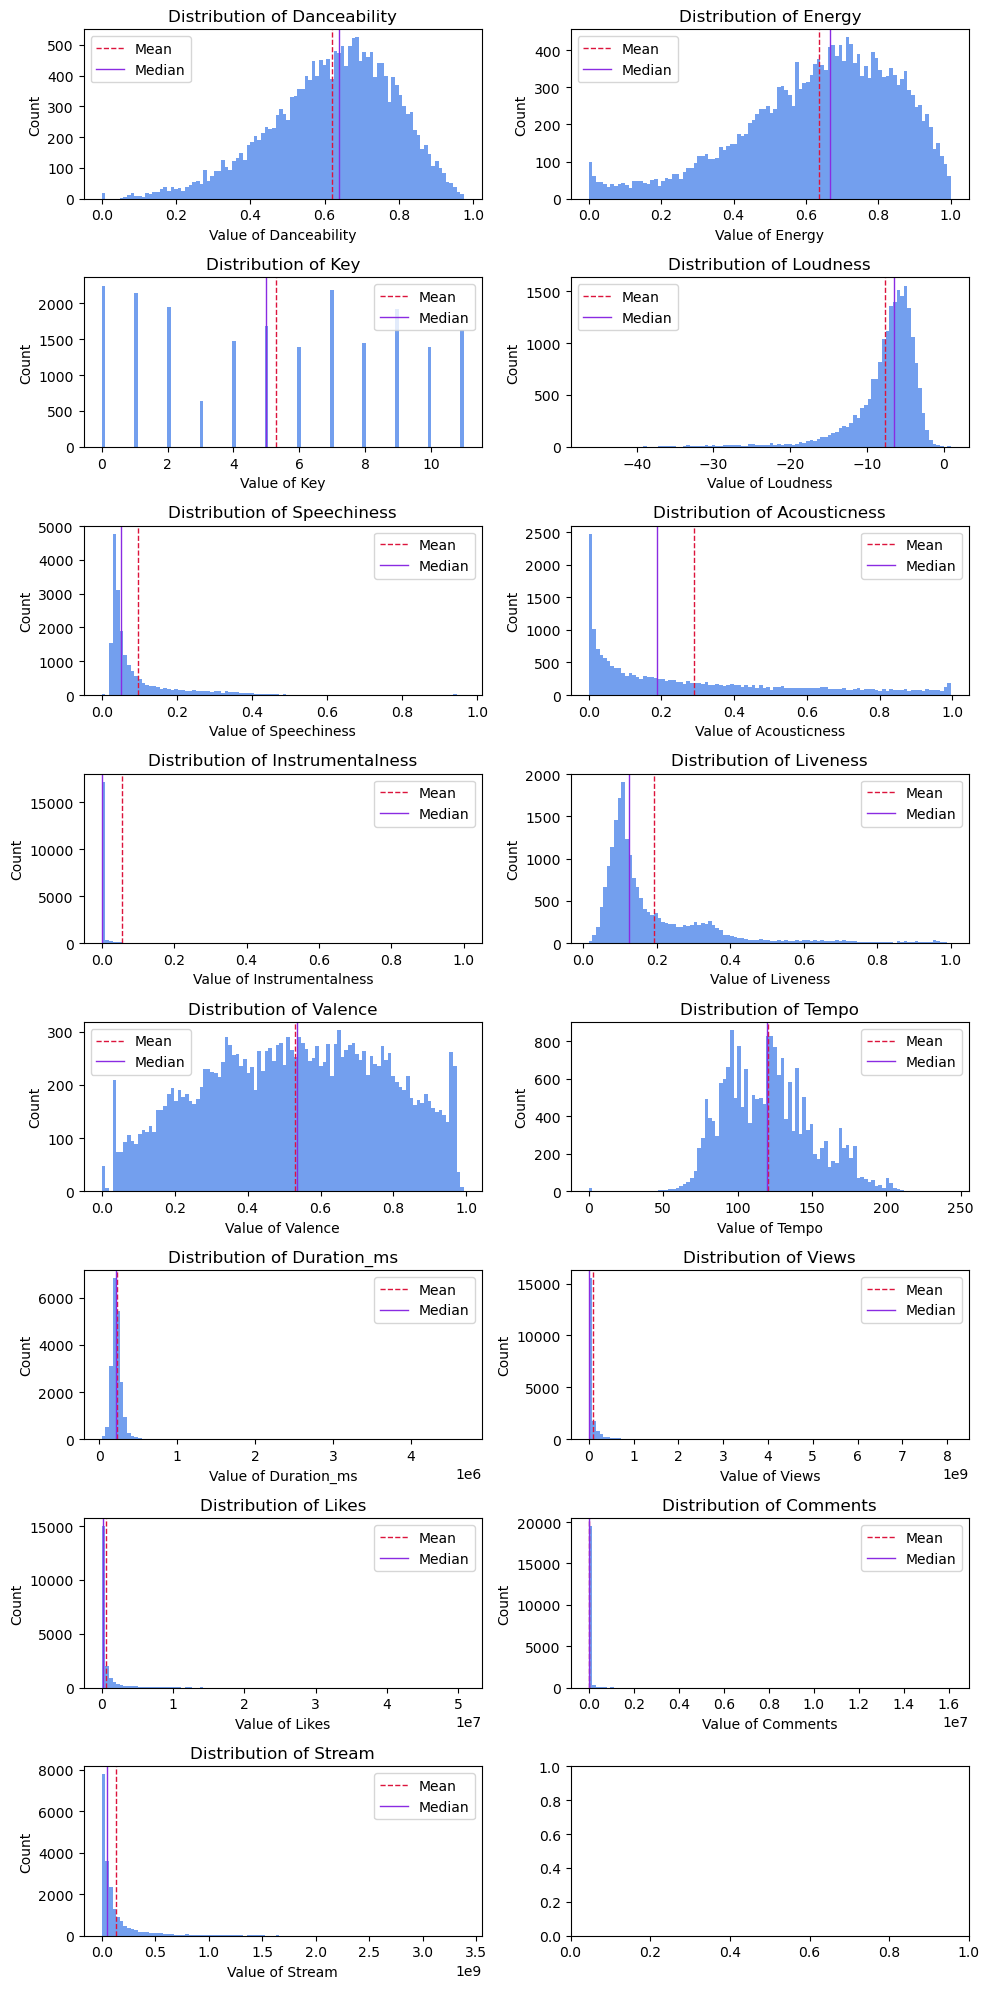

In [7]:
# Plot the distributions of each numeric column
# Instantiate subplots
plt.subplots(8, 2, figsize=(10, 20))

# Loop over numeric features
for i, col in enumerate(numeric_df.columns):
    plt.subplot(8, 2, i+1)
    plt.hist(numeric_df[col], bins=100, color='cornflowerblue', alpha=0.9)
    plt.axvline(numeric_df[col].mean(), color='crimson', linestyle='--', linewidth=1, label='Mean')
    plt.axvline(numeric_df[col].median(), color='blueviolet', linestyle='-', linewidth=1, label='Median')
    
    # Label plots
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'Value of {col}')
    plt.ylabel('Count')
    plt.legend()
    
# Display plots
plt.tight_layout()
plt.show()

The above plots give some valuable insights into how the numerical data in the dataset is distributed.  

Danceability, energy, valence, & tempo all are all approaching something close to a normal distribution, relative to the other features in the dataset. This assumption is also supported by the apparently closeness of the means and medians of these features.

Loudness, on the other hand, is heavily skewed to the left, whereas speechiness, acousticness, and liveness are all skewed to the right. This tells us that while most songs tend towards one end of the scale for their respective musical feature, there is still a significant degree of variance up (or down) that scale depending on the song. 

Acousticness is interesting given its definition. We can see that there is a high number of values that are near zero. The definition of acousticness under this scale tells us that a zero is a song that is composed of entirely electronic musical notes and a 1 is entirely natural instruments. The skew to the right tells us that more of the songs in our dataset are created electronically rather than acoustically.

Speechiness tells a similar story. A speechiness of zero implies that there are no spoken words on a track and 1 implies that there are only spoken words. It is best not to jump to conclusions about what this means in the context of "speechiness". This certainly does not imply that there are only tracks with instrumentals in the dataset. I think this says more about the nature of music, or perphaps how this value was collected, implying that not all songs are %100 singing with no instruments (sorry a capella fans).  

Duration, views, likes, comments, & stream are all heavily skewed to the left. In some cases, we can't even see the data on the right. This tells us that there are some very big outliers in the dataset. It looks like not all songs are created equal.

<a id='section2'></a>
#### Relationship between numeric values & YouTube views
Next, I want to evaluate the relationship between numeric values and the number of views a song has on YouTube.

In [8]:
# Drop Views from the numeric dataframe
numeric_df.drop('Views', axis=1, inplace=True)

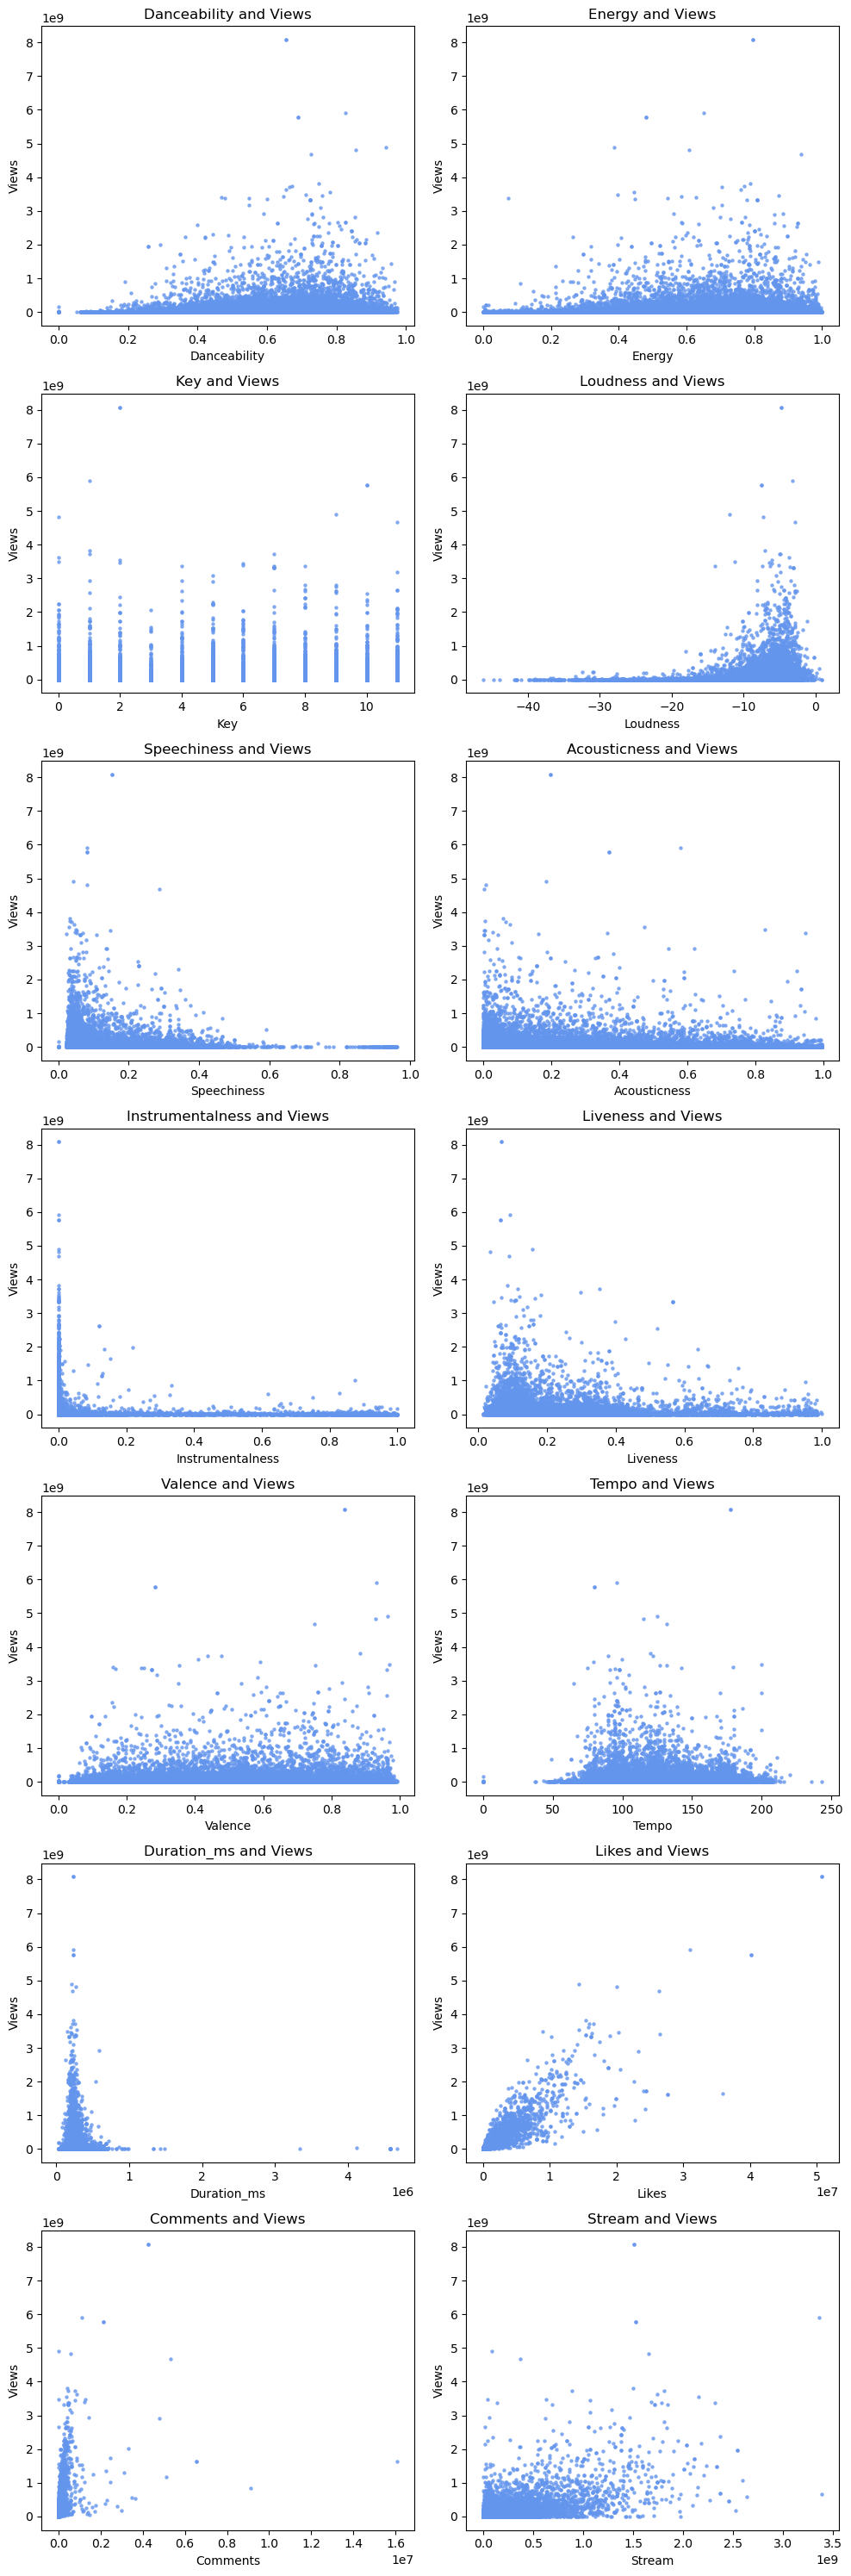

In [9]:
# Plot relationship between numeric values & views
# Instantiate subplots
plt.subplots(7, 2, figsize=(10, 30))

# Loop over features to create scatterplots
for i, col in enumerate(numeric_df.columns):
    plt.subplot(7, 2, i+1)
    plt.scatter(numeric_df[col], df['Views'], color='cornflowerblue', alpha=0.7, s=5)
    
    # Label the plots
    plt.title(f'{col} and Views')
    plt.xlabel(col)
    plt.ylabel('Views')
    
plt.tight_layout()
plt.show()

There are some outliers in the data that is making it difficult to properly evaluate the relationship between the numeric features & the number of views a song may get on YouTube. I'll want to apply a log scales to the axes to reduce the impact of outliers on the data.

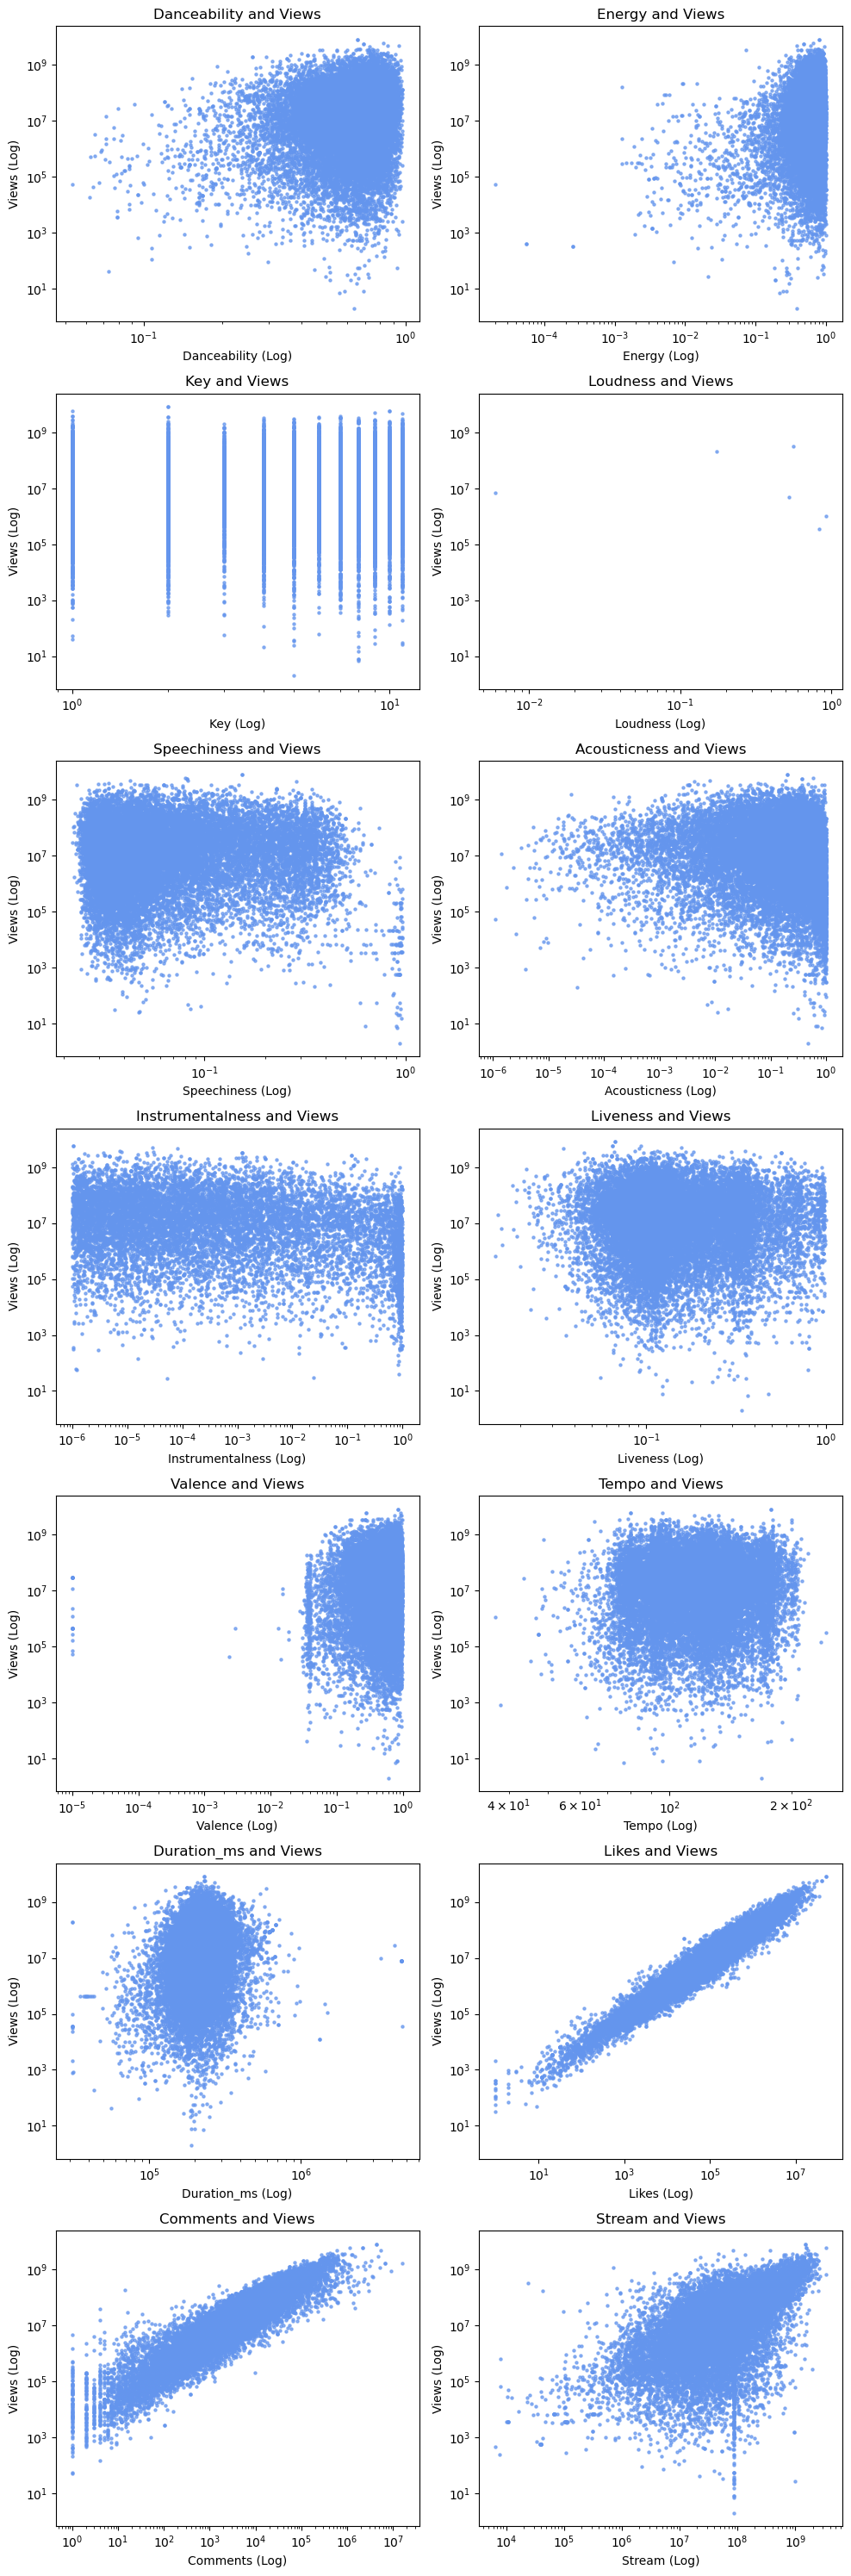

In [10]:
# Plot relationship between numeric values & views
# Instantiate subplots
plt.subplots(7, 2, figsize=(10, 30))

# Loop over features to create scatterplots
for i, col in enumerate(numeric_df.columns):
    plt.subplot(7, 2, i+1)
    plt.scatter(numeric_df[col], df['Views'], color='cornflowerblue', alpha=0.7, s=5)
    
    # Label the plots
    plt.title(f'{col} and Views')
    plt.xlabel(f'{col} (Log)')
    plt.ylabel('Views (Log)')
    
    # Scale the axes
    plt.xscale('log')
    plt.yscale('log')
    
plt.tight_layout()
plt.show()

We lose quite a bit of interpretability when we apply a logarithmic scale to the axes, but we can clearly see the features that have a clear relationship with views. Likes and comments have a clear positive linear relationship with the number of views a video has, which would make sense. The more views a video has, the higher likelihood it has of garnering comments and likes. We see a less clear relationship between streams and views. Again, it stands to reason that if a song is popular on Spotify, it will also be popular on YouTube, as listeners use plenty of different channels to listen to their music.

<a id='section3'></a>
#### Top Artists by Views & Streams
Since we're trying to predict which what influences views on YouTube, I want to see which artists have the most views. I'll look for the top 10 artists.

In [11]:
# Groupby artists & views
artist_views = df.groupby('Artist')['Views'].sum().reset_index()

# Sort the dataframe by 'Views' in descending order
artist_views = artist_views.sort_values('Views',ascending=False)

# Select top 10 artists
top_artists = artist_views.head(10)

# Verify
top_artists

,Artist,Views
522,Ed Sheeran,1.546021e+10
371,CoComelon,1.460167e+10
946,Katy Perry,1.312063e+10
331,Charlie Puth,1.216759e+10
1140,Luis Fonsi,1.162811e+10
919,Justin Bieber,1.099106e+10
419,Daddy Yankee,1.087193e+10
265,Bruno Mars,1.024092e+10
1175,Macklemore & Ryan Lewis,1.012206e+10
378,Coldplay,9.997278e+09


Text(0.5, 1.0, 'Top 10 artists by YouTube Views')

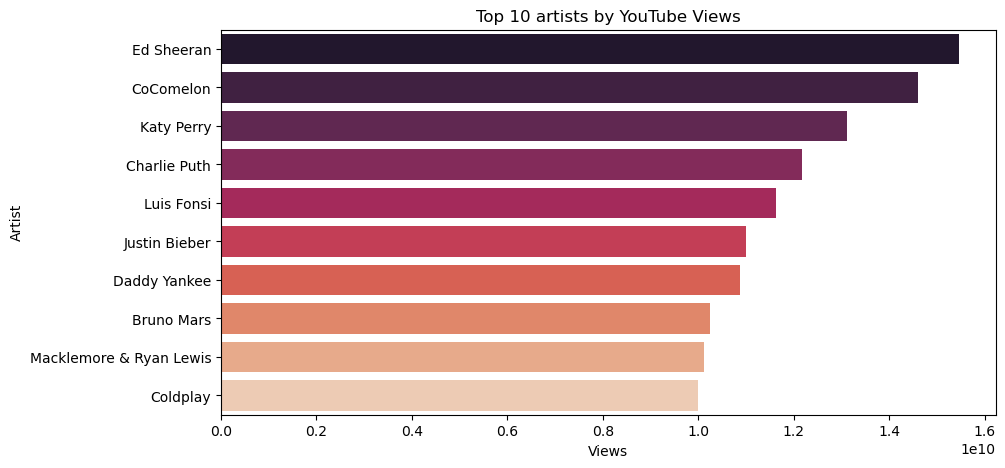

In [12]:
# Instantiate figure
plt.figure(figsize=(10,5))

# Plot
sns.barplot(top_artists['Views'], top_artists['Artist'], palette='rocket')
plt.title('Top 10 artists by YouTube Views')

I'm not overly suprised by any of the results here. I recognize most of these artists and I would expect they would have a ton of views on YouTube. Luis Fonsi and Daddy Yankee are both very big artists in Latin America and it would stand to reason that they would represent some of the top artists.

CoComelon is a wildly popular children's YouTube channel. I suspect that the number of views on YouTube is much higher than the number of streams on Spotify beceause YouTube has a visual component to it, which would be used by parents to entertain their children. Lets check the top 10 artists by Spotify Streams to be sure.

In [13]:
# Groupby artists and steams
artist_stream = df.groupby('Artist')['Stream'].sum().reset_index()

# Sort by stream in descending order
artist_stream = artist_stream.sort_values('Stream', ascending=False)

# Select top 10 artistse
top_artists_stream = artist_stream.head(10)

# Verify
top_artists_stream

,Artist,Stream
1486,Post Malone,1.525126e+10
522,Ed Sheeran,1.439488e+10
503,Dua Lipa,1.340808e+10
1848,The Weeknd,1.246428e+10
919,Justin Bieber,1.209777e+10
1985,XXXTENTACION,1.201191e+10
772,Imagine Dragons,1.185831e+10
378,Coldplay,1.177848e+10
973,Khalid,1.138684e+10
265,Bruno Mars,1.089786e+10


Text(0.5, 1.0, 'Top 10 artists by Spotify Streams')

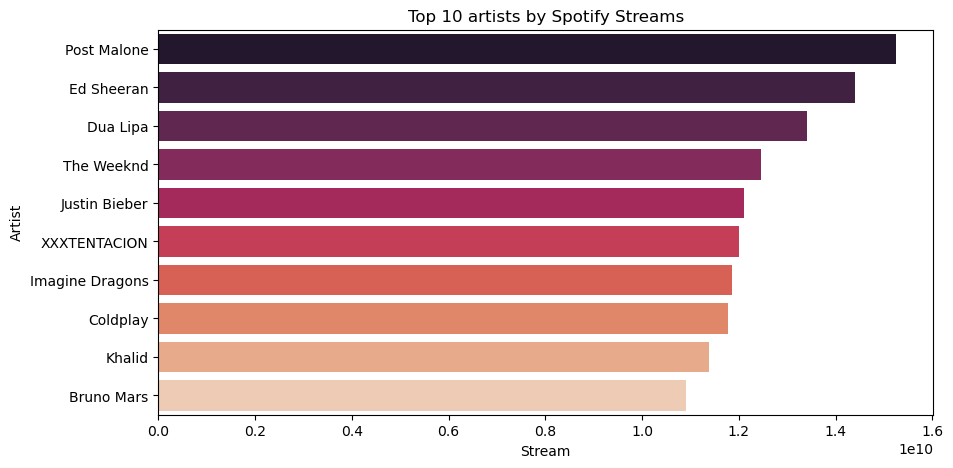

In [14]:
# Instantiate figure
plt.figure(figsize=(10,5))

# Plot
sns.barplot(top_artists_stream['Stream'], top_artists_stream['Artist'], palette='rocket')
plt.title('Top 10 artists by Spotify Streams')

As I suspected, CoComelon is not on the top 10 artists by Spotify streams. Also notice that Ed Sheeran is not the top artist. Post Malone takes the top spot on Spotify, which is interesting because he is not even represented on the top YouTube artists. Also notice that Luis Fonsi and Daddy Yankee are not on this list, which would suggest that YouTube may be the preferred method of streaming Latin American artists.

In [15]:
df.head()

,Artist,Track,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,...,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,...,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,...,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,...,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,...,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,...,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


<a id='section4'></a>
#### Correlation Heatmap

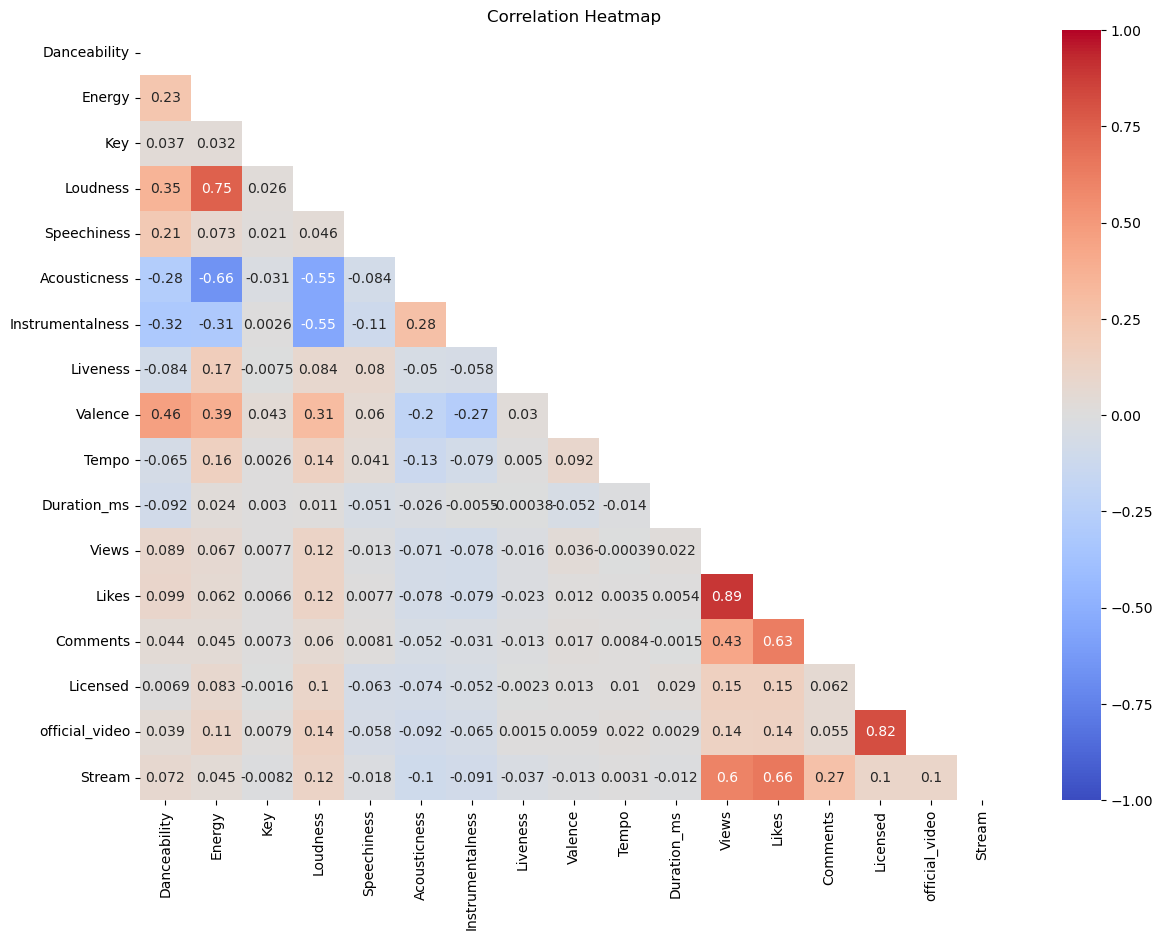

In [16]:
# Compute correlation matrix
corr_matrix = df.corr()

# Create mask for upper triangle
mask = np.triu(corr_matrix)

# Plot the matrix
plt.figure(figsize = (14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

It comes as no surprise that there is a strong correlation between Views & Likes (0.89) as well as Likes & Comments (0.63). Again, it stands to reason that a video with plenty of traffic would have a strong view to like & like to comment ratio. Viewers need to watch the video to like and comment on it after all.

Stream and Views (and associated YouTube values) are strongly correlated as well (0.6). There's no shocking revalation there, as I have noted that correlation earlier.

Licenced channels and officials videos are highly correlated enough (0.89) for me to consider these effectively the same thing. 

Acousticness is negatively correlated with Energy (-0.66), which makes some intuitive sense, given that acoustic songs tend to be more melancholy or slower in tone. Acousticness (along with Instrumentalness) are also negatively correlated with Loudness (-0.55). It would appear as though there is some similarity between Acousticness and Instrumentalness in this regard. We can see some weaker correlation between Acousticness and Instrumentalness (0.28) but they are not the same. A highly acoustic song featuring primarily acoustic instruments to make it (as opposed to digital music software) and a highly instrumental song featuring little to no vocals.

Loudness on the other hand is highly correlated with Energy (0.75), which again, seems rather intuitive. A louder song would tend to be associated with a high degree of energy in a song. I would expect there to be a high degree of Danceability to accompany Loudness and Energy, yet this value is a more weakly correlated with energy at 0.35 when compared to Loudness and 0.23 compared to Energy.

Danceability has the highest correlation with Valence (0.46), which is the defined as the percieved positivity of the track. This would be expected as songs that one would usually dance to are tend to be more happy and upbeat, whereas songs with sadder and a more depressed tone are not usually associated with dancing. 

I can see a pattern emerging here. Acousticness and Istrumentalness have some negative relationship with Loudness, Valence, Energy, & Danceability, which begins to paint a picture in how one might think about classifying songs in their own head. There are different songs for different moods, which can be roughly defined by these features.

What is truly interesting about this matrix is that the Key of a song is not strongly correlated with any of these other features. It would appear that the specific key has no bearing on the other features of the songs. It is also difficult to assign ordinality to different keys (some musical theorists would disagree), which run from 0 to 11 in this dataset as represented by the image of pitch class notation below. In the context of this problem, the key should be one hot encoded during feature engineering to deal with this.

<a id='section5'></a>
#### Pitch Class Notation

![alt text](https://davidkulma.com/wp-content/uploads/2016/08/Integer-Circle.001.png)

In [17]:
# Convert key datatype from float to int
df['Key'] = df['Key'].astype(int)

# Instantiate key dictionary
key_dict = {0:'C', 
            1:'C#/Db', 
            2:'D',
            3:'D#/Eb',
            4:'E',
            5:'F',
            6:'F#/Gb',
            7:'G',
            8:'G#/Ab',
            9:'A',
            10:'A#/Bb',
            11:'B'
           }

In [18]:
# Replace integers with key values
df['Key'] = df['Key'].replace(key_dict)

In [19]:
# Occurence of Keys
df['Key'].value_counts()

C        2246
G        2186
C#/Db    2141
D        1951
A        1926
F        1681
B        1624
E        1472
G#/Ab    1446
F#/Gb    1393
A#/Bb    1391
D#/Eb     642
Name: Key, dtype: int64

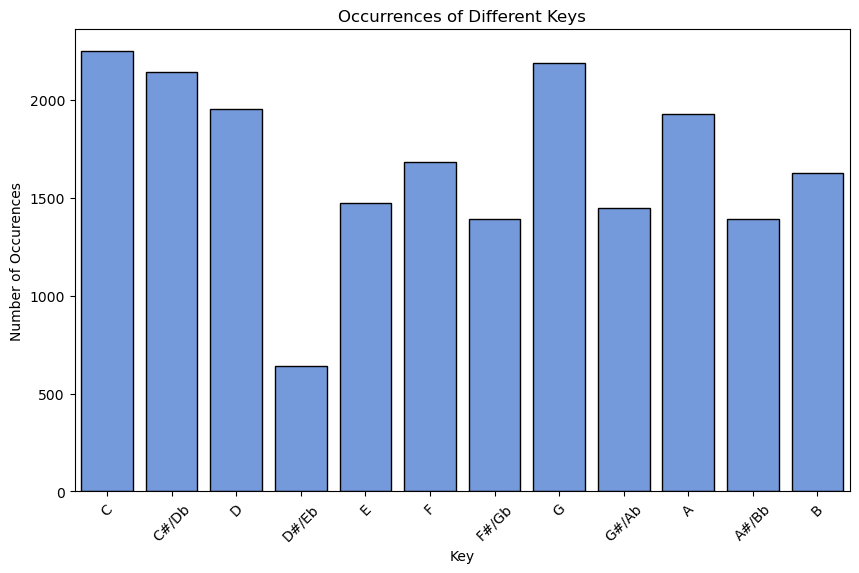

In [20]:
# Plot the occurences of different keys
plt.figure(figsize=(10,6))

# Use countplot for ordering
order = [key_dict[i] for i in sorted(key_dict.keys())]
sns.countplot(data=df, x='Key', color='cornflowerblue', edgecolor='black', order=order)

# Label
plt.title('Occurrences of Different Keys')
plt.xlabel('Key')
plt.ylabel('Number of Occurences')
plt.xticks(rotation=45)

plt.show()

As an amateur musician, it doesn't surprise me that the key of C is the most popular key. I don't need to comment on every key heere, but when I move to one-hot encode these keys, I will drop C as the reference category. It would appear that the key of C serves as a good reference point for musicians as well as data scientists.

<a id='section6'></a>
#### Relationship between Streams & Views by Album Type

Next I want to take a look at the two core measures of popularity for a given song, YouTube views and Spotify streams, and see ww sort of impact the album type has on the outcome.

In [21]:
# Get album counts
album_counts = df['Album_type'].value_counts()

# View counts
print(album_counts)

album          14497
single          4839
compilation      763
Name: Album_type, dtype: int64


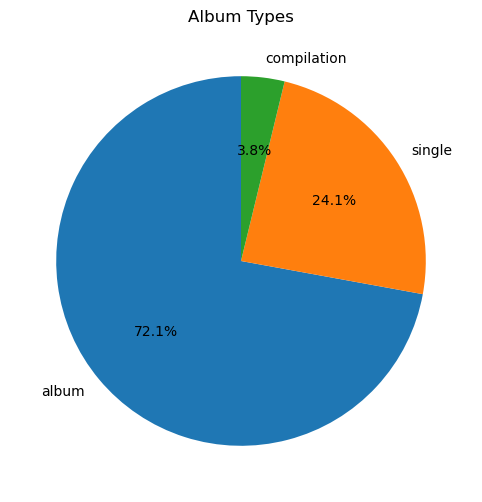

In [22]:
# Create a pie chart of album types
plt.figure(figsize=(8, 6))
album_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Album Types')
plt.ylabel('') # Remove the y label
plt.show()

Songs released as a full album are by far the most popular format, yet singles represent nearly a quarter of the data. Compilations seem to be far less popular, representing only a small portion of the data.

In [23]:
# Filter dataframe by album types
album_df = df[df['Album_type'] == 'album']
single_df = df[df['Album_type'] == 'single']
comp_df = df[df['Album_type'] == 'compilation']

In [24]:
# Print mean stream and view counts by album types
# Album
print(f"Mean number of YouTube views by album: {round(album_df['Views'].mean(), 2)}")
print(f"Mean number of Spotify streams by album: {round(album_df['Stream'].mean(), 2)}")

# Single
print(f"Mean number of YouTube views by sinlge: {round(single_df['Views'].mean(), 2)}")
print(f"Mean number of Spotify streams by single: {round(single_df['Stream'].mean(), 2)}")

# Complilation
print(f"Mean number of YouTube views by compilation: {round(comp_df['Views'].mean(), 2)}")
print(f"Mean number of Spotify streams by compilation: {round(comp_df['Stream'].mean(), 2)}")

Mean number of YouTube views by album: 98924992.51
Mean number of Spotify streams by album: 150271559.1
Mean number of YouTube views by sinlge: 82901484.45
Mean number of Spotify streams by single: 103198909.14
Mean number of YouTube views by compilation: 80132858.73
Mean number of Spotify streams by compilation: 87192751.5


I'm going to plot these means to aid in comprehension then check for statisical significance in these means across the total mean of streams and views in the whole dataset.

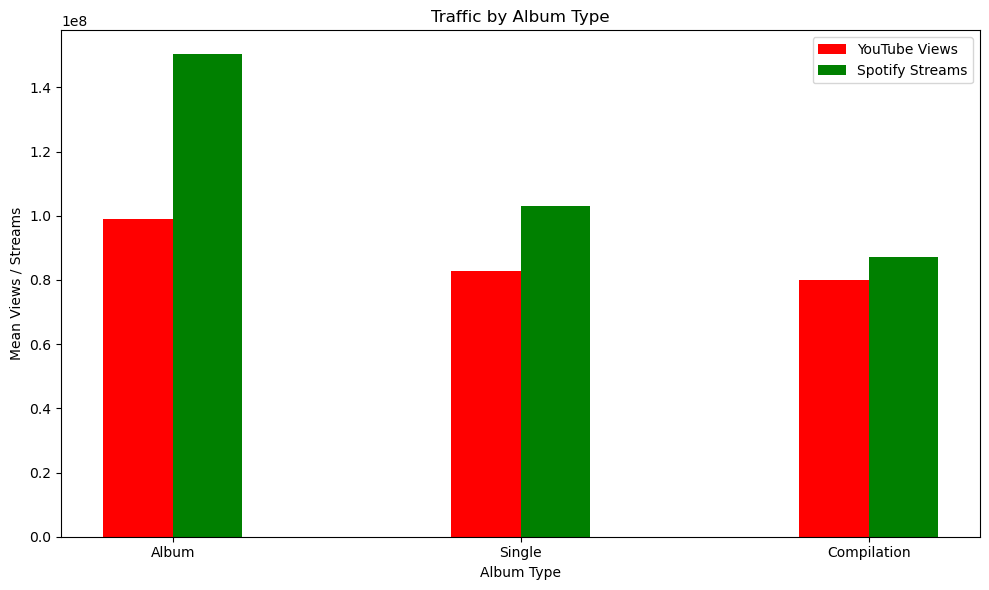

In [25]:
# Plot the distribution of views & streams by album type

# Extract means
view_means = [
    round(album_df['Views'].mean(), 2),
    round(single_df['Views'].mean(), 2),
    round(comp_df['Views'].mean(), 2),
]

stream_means = [
    round(album_df['Stream'].mean(), 2),
    round(single_df['Stream'].mean(), 2),
    round(comp_df['Stream'].mean(), 2)
]

labels = ['Album', 'Single', 'Compilation']

# Set bar width
bar_width = 0.20
index = range(len(view_means))

# Create plot
plt.subplots(figsize=(10,6))
plt.bar(index, view_means, bar_width, color='r', label='YouTube Views')
plt.bar([i + bar_width for i in index], stream_means, bar_width, color='g', label='Spotify Streams')

# Label
plt.title('Traffic by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Mean Views / Streams')
plt.xticks([i + bar_width / 2 for i in index], labels)
plt.legend()

plt.tight_layout()
plt.show()

Songs released on albums seem to substantially outperform single and compilation releases on Spofity, whereas views on YouTube, the album type appears to have less influence on the popularity of the song. Single and compilation releases have nearly the same mean number of views on YouTube.

---

<a id='section7'></a>
#### Next Steps
From this EDA, I've uncovered some insights into correlations between certain musical variables, like Loudness and Energy, seen the apparent LACK of correlation between features like musical Key, and what appears to be a non-existent correlation between musical features and my intended target variable of YouTube Views.

To proceed effectively, I feel that I will need to engineer some features that will allow me to better make predictions. In the next portion of this project, I will perform some web-scraping, as well as feature engineering that will give me more to work data to with. My plan for the next stage are as follows:
- Use YouTube URLs to web-scrape publish dates & determing the average views per month of a song
- One hot encode musical keys & album types
- Additional cleaning by dropping values needed for EDA but not for modelling (e.g. Track name, Licensed Video, etc.)

---